# Explorando los datasets

## Imports

In [1]:
from os import listdir, mkdir
from shutil import move, copy
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from IPython.display import display


rm: cannot remove './Dataset/': No such file or directory


## Kaggle Diabetic Retinopathy Classification

### Cropped train labels

 Load the dataset

,image
level,
0,25802
1,2438
2,5288
3,872
4,708


Text(0.5, 1.0, 'Levels of DR in the dataset')

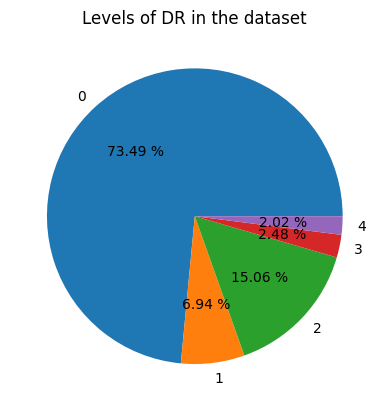

In [2]:
df = pd.read_csv('./Daniel-files/PracticasProfesionales/Data/Raw/DrClassification/KaggleDrDetection/trainLabels_cropped.csv')

df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
display(df.groupby('level').count())

plt.pie([df.loc[df['level'] == n].count()[0] for n in range(5)], labels = range(5), autopct='%.2f %%')
plt.title("Levels of DR in the dataset")

Undersampling to balance the dataset

,image
level,
0,708
1,708
2,708
3,708
4,708


Text(0.5, 1.0, 'Levels of DR in the dataset')

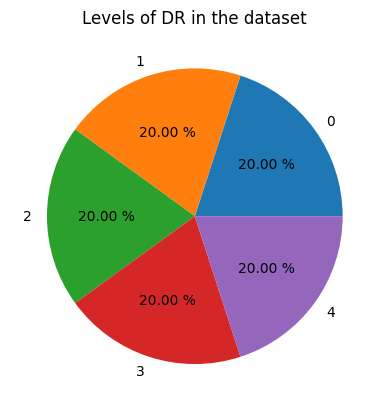

In [3]:
balanced_df = df.groupby('level').sample(708)

balanced_df.reset_index(drop=True, inplace=True)

display(balanced_df.groupby('level').count())

plt.pie([balanced_df.loc[balanced_df['level'] == n].count()[0] for n in range(5)], labels = range(5), autopct='%.2f %%')
plt.title("Levels of DR in the dataset")



In [4]:
balanced_df.to_csv('./Daniel-files/PracticasProfesionales/Data/Raw/DrClassification/KaggleDrDetection/trainLabels_cropped_balanced.csv', index_label='index')

### Train labels

Load the dataset

,image
level,
0,25810
1,2443
2,5292
3,873
4,708


Text(0.5, 1.0, 'Levels of DR in the dataset')

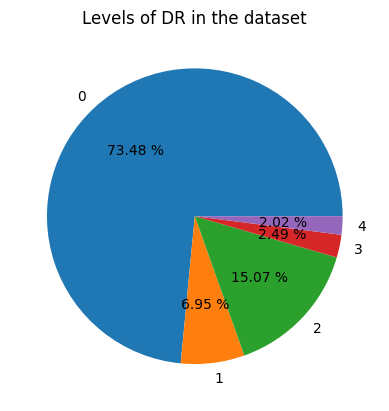

In [5]:
df = pd.read_csv('./Daniel-files/PracticasProfesionales/Data/Raw/DrClassification/KaggleDrDetection/trainLabels.csv')

display(df.groupby('level').count())

plt.pie([df.loc[df['level'] == n].count()[0] for n in range(5)], labels = range(5), autopct='%.2f %%')
plt.title("Levels of DR in the dataset")

Undersampling to balance the dataset

,image
level,
0,708
1,708
2,708
3,708
4,708


Text(0.5, 1.0, 'Levels of DR in the dataset')

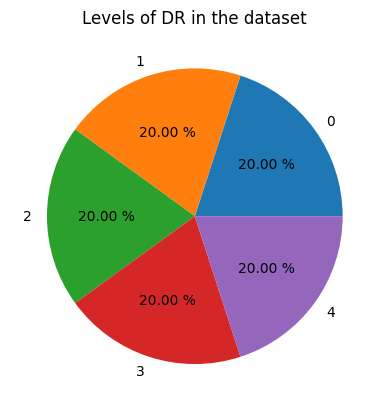

In [6]:
balanced_df = df.groupby('level').sample(708)

balanced_df.reset_index(drop=True, inplace=True)

display(balanced_df.groupby('level').count())

plt.pie([balanced_df.loc[balanced_df['level'] == n].count()[0] for n in range(5)], labels = range(5), autopct='%.2f %%')
plt.title("Levels of DR in the dataset")



In [7]:
balanced_df.to_csv('./Daniel-files/PracticasProfesionales/Data/Raw/DrClassification/KaggleDrDetection/trainLabels_balanced.csv', index_label='index')

## Messidor Diabetic Retinopathy

### DR Classification

In [2]:
!rm -r './DB/'

rm: remove write-protected regular file './DB/Base13/Annotation_Base13.xls'? 

In [4]:
bd = "./Data/Raw/VariedDrAndres/Messidor/BD1"

!mkdir './DB/'

zipfiles = (f for f in listdir(bd) if f.endswith('.zip') == True)
for z in zipfiles:
    !unzip "{bd}/{z}" -d './DB'

[move(f'./DB/Base11/{f}', f'./DB/{f}') for f in listdir('./DB/Base11/')]
!rm -r './DB/Base11/'

[move(f'./DB/Base13/{f}', f'./DB/{f}') for f in listdir('./DB/Base13/')]
!rm -r './DB/Base13/'

mkdir: cannot create directory ‘./DB/’: File exists
Archive:  ./Data/Raw/VariedDrAndres/Messidor/BD1/Base34.zip
  inflating: ./DB/20051208_42322_0400_PP.tif  
  inflating: ./DB/20051208_42546_0400_PP.tif  
  inflating: ./DB/20051208_42552_0400_PP.tif  
  inflating: ./DB/20051209_38404_0400_PP.tif  
  inflating: ./DB/20051212_36525_0400_PP.tif  
  inflating: ./DB/20051212_36548_0400_PP.tif  
  inflating: ./DB/20051212_36605_0400_PP.tif  
  inflating: ./DB/20051212_36640_0400_PP.tif  
  inflating: ./DB/20051212_37442_0400_PP.tif  
  inflating: ./DB/20051212_38000_0400_PP.tif  
  inflating: ./DB/20051212_38043_0400_PP.tif  
  inflating: ./DB/20051212_38076_0400_PP.tif  
  inflating: ./DB/20051212_38106_0400_PP.tif  
  inflating: ./DB/20051212_38130_0400_PP.tif  
  inflating: ./DB/20051212_38161_0400_PP.tif  
  inflating: ./DB/20051212_40940_0400_PP.tif  
  inflating: ./DB/20051212_41009_0400_PP.tif  
  inflating: ./DB/20051212_41144_0400_PP.tif  
  inflating: ./DB/20051212_41169_0400_PP.t

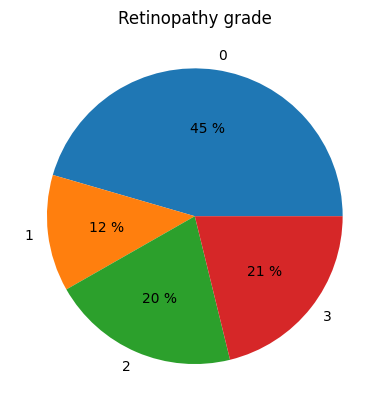

Retinopathy grade
0    546
1    153
2    247
3    254
Name: Image name, dtype: int64

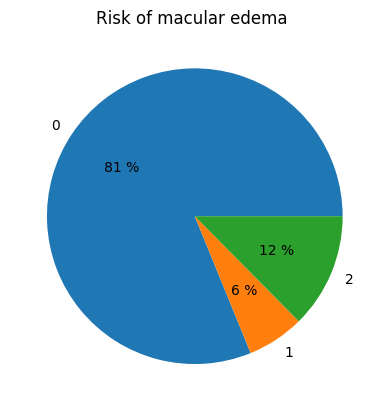

Risk of macular edema   Retinopathy grade
0                       0                    546
                        1                    142
                        2                    182
                        3                    104
1                       1                      5
                        2                     28
                        3                     42
2                       1                      6
                        2                     37
                        3                    108
Name: Image name, dtype: int64

In [6]:
messidor = './DB/'

dataframes = [pd.read_excel(messidor+f) for f in listdir(messidor) if f.endswith('.xls')]

df = pd.concat(dataframes)

plt.pie([df.loc[df['Retinopathy grade'] == n].count()[0] for n in range(4)], labels = range(4), autopct='%d %%')
plt.title("Retinopathy grade")
plt.show()
display(df.groupby('Retinopathy grade').count()['Image name'])

plt.pie([df.loc[df['Risk of macular edema '] == n].count()[0] for n in range(3)], labels = range(3), autopct='%d %%')
plt.title("Risk of macular edema ")
plt.show()
display(df.groupby(['Risk of macular edema ', 'Retinopathy grade']).count()['Image name'])

### Dataset to grade DR by classificaton

In [7]:
column = 'Retinopathy grade'
df = df.drop(columns=['Ophthalmologic department', 'Risk of macular edema '])

#### Train

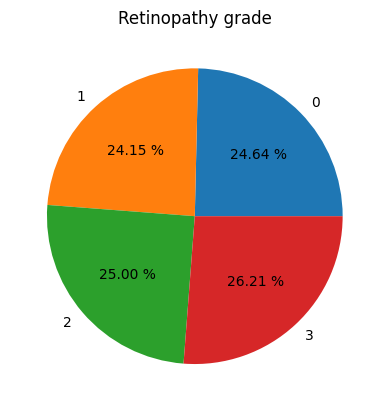

,Image name
Retinopathy grade,
0,203
1,199
2,206
3,216


,Image name
Retinopathy grade,
0,5
1,5
2,5
3,5


In [25]:
training_df = df.groupby(column).sample(254, replace=True)

validation_df = training_df.groupby(column).sample(5)

training_df = training_df.drop(validation_df.index)

validation_df.reset_index(drop=True, inplace=True)
training_df.reset_index(drop=True, inplace=True)

plt.pie([training_df.loc[training_df[column] == n].count()[0] for n in range(4)], labels = range(4), autopct='%.2f %%')
plt.title(column)
plt.show()

display(training_df.groupby(column).count())
display(validation_df.groupby(column).count())

In [26]:
def organize_by_referability(dataf):
    grades = {i:list(dataf.loc[dataf[column] == i].pop('Image name')) for i in range(4)}
    referability = {'referable':[], 'non-referable':[]}
    [referability['referable'].extend(grades[k]) if k == 1 or k == 2 else referability['non-referable'].extend(grades[k]) for k in grades.keys()]

    return referability

def organize_set(data_ref, data_dir):
    for k in data_ref.keys():
        mkdir(data_dir+f'{k}')
        for v in data_ref[k]:
            im_name = v.split('.')[0]
            im = cv2.imread(messidor+v)
            cv2.imwrite(data_dir+f'{k}/{im_name}.jpg', im)

In [27]:
!rm -r './Dataset/'
!mkdir './Dataset'

In [28]:
train_dir = './Dataset/training/'
!mkdir './Dataset/training/'

train_ref = organize_by_referability(training_df)
organize_set(train_ref, train_dir)

#### Validation

In [29]:
test_dir = './Dataset/validation/'
!mkdir './Dataset/validation/'

test_ref = organize_by_referability(validation_df)
organize_set(test_ref, test_dir)

#### Test

In [30]:
testing_df = df.groupby(column).sample(3)
testing_df.reset_index(drop=True, inplace=True)

display(testing_df)

,Image name,Retinopathy grade
0,20051130_60140_0400_PP.tif,0
1,20051205_59651_0400_PP.tif,0
2,20060412_59355_0200_PP.tif,0
3,20060412_52758_0200_PP.tif,1
4,20051116_43954_0400_PP.tif,1
5,20051202_37011_0400_PP.tif,1
6,20060407_45477_0200_PP.tif,2
7,20051020_63829_0100_PP.tif,2
8,20060530_54443_0100_PP.tif,2
9,20051205_35246_0400_PP.tif,3


In [31]:
test_dir = './Dataset/testing/'
!mkdir './Dataset/testing/'

test_ref = organize_by_referability(testing_df)
organize_set(test_ref, test_dir)